<a href="https://colab.research.google.com/github/AlviNabil/MachineLearningLab_CSE-4111/blob/main/lab1/Assignment_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing all the required Libraries

In [87]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 



#Read the Pima Dataset and store it in a variable

In [88]:
# for google colab 
# ========>>========>>=========>>========>>
# from google.colab import drive
# drive.mount('/content/drive')
# pima = pd.read_csv('/content/drive/MyDrive/4_1/ML/lab1/data/diabetes.csv')
# ==========>>=========>>===========>>==========>>

#for local 
pima = pd.read_csv('../data\diabetes.csv')
pima.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Visualizing the effects of various features on output

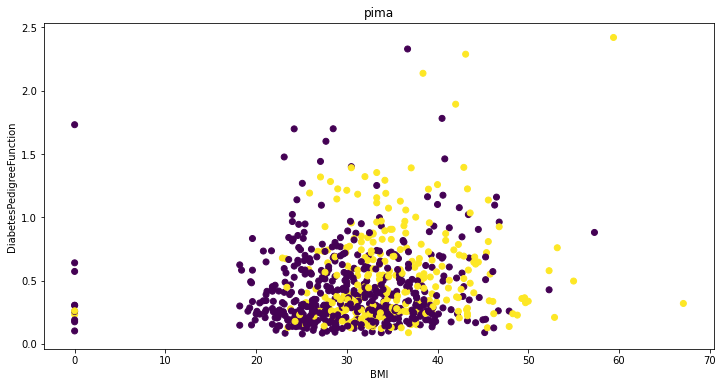

In [89]:
figx = str(input("Feature 1 Index: "))
figy = str(input("Feature 2 Index: "))
# figx=5
# figy=6
plt.figure(figsize=(12,6))
plt.title("pima")
plt.scatter(pima.iloc[:,int(figx)], pima.iloc[:,int(figy)], c=pima.iloc[:, pima.shape[1]-1])
plt.xlabel(pima.columns[int(figx)])
plt.ylabel(pima.columns[int(figy)])
plt.show()

#Separating Data and Target variables from the CSV file

In [90]:
pima_data = pima.iloc[:,0:pima.shape[1]-1]
pima_target = pima.iloc[:,pima.shape[1]-1]

#Checking and printing the data and targets and their shape

In [91]:
print(pima_data.head())
print(pima_target.head())
print(pima_data.shape)
print(pima_target.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64
(768, 8)
(768,)


#Spliting the data and target into train set and test set in 80/20 randomly where random state can be chosen(here 42)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(pima_data, pima_target, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


#Training the KNN model with our train data

In [93]:
from sklearn.neighbors  import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#Predicting the result





In [94]:
y_pred = KNN.predict(X_test)
print(y_pred)
y_pred
print(len(y_test))

[0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 0]
154


#Determining the accuracy of this test

In [95]:
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.6493506493506493


#Determining the error percentage for different value of K in KNN and keeping them in an error list

In [96]:
error = []


for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i !=y_test))
  print("error percentage:",np.mean(pred_i!=y_test)*100,"% \tNumber of Error: ",int(np.mean(pred_i!=y_test)*len(y_test)))

error percentage: 32.467532467532465 % 	Number of Error:  50
error percentage: 29.87012987012987 % 	Number of Error:  46
error percentage: 35.064935064935064 % 	Number of Error:  54
error percentage: 29.22077922077922 % 	Number of Error:  45
error percentage: 33.76623376623377 % 	Number of Error:  52
error percentage: 27.27272727272727 % 	Number of Error:  42
error percentage: 31.16883116883117 % 	Number of Error:  48
error percentage: 25.324675324675322 % 	Number of Error:  38
error percentage: 27.92207792207792 % 	Number of Error:  43
error percentage: 23.376623376623375 % 	Number of Error:  36
error percentage: 26.623376623376622 % 	Number of Error:  41
error percentage: 22.07792207792208 % 	Number of Error:  34
error percentage: 22.727272727272727 % 	Number of Error:  35
error percentage: 22.727272727272727 % 	Number of Error:  35
error percentage: 24.025974025974026 % 	Number of Error:  37
error percentage: 22.07792207792208 % 	Number of Error:  34
error percentage: 22.72727272727

#Plotting Mean Error vs k-Value 

Text(0, 0.5, 'Mean Error')

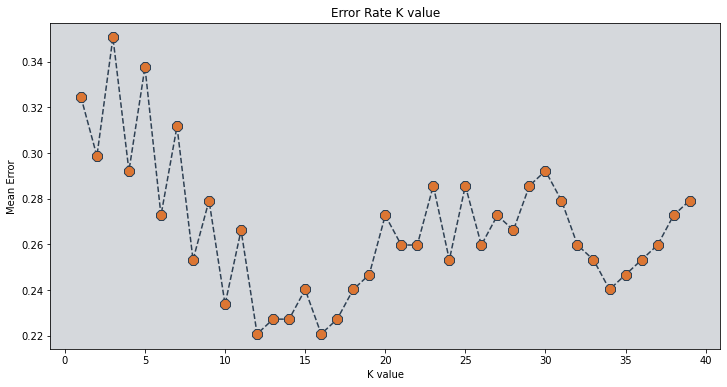

In [97]:
plt.figure(figsize=(12,6))
ax=plt.axes()
ax.set(facecolor="#D5D8DC")
plt.plot(
    range(1,40), 
    error, 
    color='#2E4053', 
    linestyle='dashed', 
    marker='8', 
    markerfacecolor='#DC7633', 
    markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

#Finding the best value of k for our data which is for minimum error

In [98]:
print("The best K value ", np.argmin(error)+1, "The minimum error value is :", min(error),"\n(If multiple first one is taken)")

The best K value  12 The minimum error value is : 0.22077922077922077 
(If multiple first one is taken)
